In [48]:
import pandas as pd
import seaborn as sns

In [49]:
df = pd.read_csv('medical_examination.csv')

In [46]:
df['overweight'] = df["weight"] / (df["height"]/100)**2

df.loc[df['overweight'] <=25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1

df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["gluc"] == 1, "gluc"] = 0

df.loc[df["cholesterol"] > 1, "cholesterol"] = 1
df.loc[df["gluc"] > 1, "gluc"] = 1

In [47]:
df.cholesterol.value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [7]:
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [50]:
# Add 'overweight' column
df['overweight'] = df["weight"] / (df["height"]/100)**2

df.loc[df['overweight'] <=25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1

df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["gluc"] == 1, "gluc"] = 0

df.loc[df["cholesterol"] > 1, "cholesterol"] = 1
df.loc[df["gluc"] > 1, "gluc"] = 1

df = df[df['ap_lo'] <= df['ap_hi']]


df = df[(df['height'] >= df['height'].quantile(0.025))] ## remove where heigh is less than 2.5 percentile
df = df[(df['height'] <= df['height'].quantile(0.975))] ## remove where height is more than 97.5 percentile
df = df[(df['weight'] >= df['weight'].quantile(0.025))] ## remove where weight is less than 2.5 percentile
df = df[(df['weight'] <= df['weight'].quantile(0.975))] ## remove where weight is more than 97.5 percentile



In [51]:
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1.0
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1.0
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1.0
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1.0
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,1.0


In [52]:
df.cholesterol.value_counts()

0    47398
1    15386
Name: cholesterol, dtype: int64

In [21]:
df.shape

(62784, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62784 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62784 non-null  int64  
 1   age          62784 non-null  int64  
 2   gender       62784 non-null  int64  
 3   height       62784 non-null  int64  
 4   weight       62784 non-null  float64
 5   ap_hi        62784 non-null  int64  
 6   ap_lo        62784 non-null  int64  
 7   cholesterol  62784 non-null  int64  
 8   gluc         62784 non-null  int64  
 9   smoke        62784 non-null  int64  
 10  alco         62784 non-null  int64  
 11  active       62784 non-null  int64  
 12  cardio       62784 non-null  int64  
 13  overweight   62784 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.2 MB


In [53]:
df2 = df.copy()

In [54]:
df2.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'overweight'],
      dtype='object')

Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [55]:
df2 = pd.melt(frame = df2, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [56]:
df2["total"] = 1

In [57]:
df2 = df2.groupby(['cardio', 'variable', 'value'], as_index=False).count()

In [58]:
df2

,cardio,variable,value,total
0,0,active,0.0,5786
1,0,active,1.0,26013
2,0,alco,0.0,30051
3,0,alco,1.0,1748
4,0,cholesterol,0.0,26737
5,0,cholesterol,1.0,5062
6,0,gluc,0.0,28109
7,0,gluc,1.0,3690
8,0,overweight,0.0,14157
9,0,overweight,1.0,17642


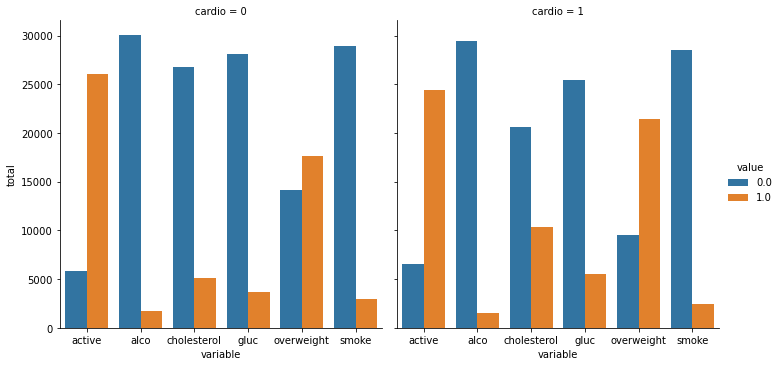

In [59]:
g = sns.catplot(x = "variable", y= "total", hue="value",
                col="cardio", kind = "bar", data=df2)

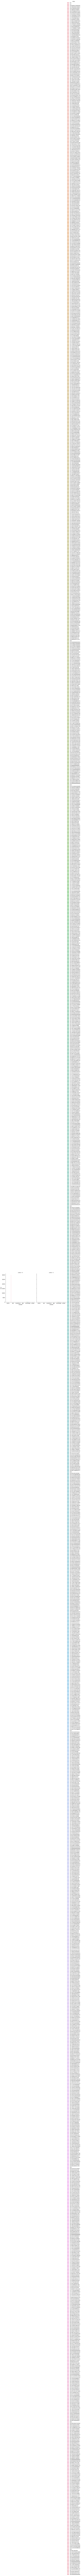

In [17]:
df2 = pd.melt(frame = df2, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df2["total"] = 1
df2 = df2.groupby(['cardio', 'variable', 'value'], as_index=False).count()
g = sns.catplot(x = "variable", y= "total", hue="value",
                col="cardio", kind = "bar", data=df2)

In [79]:
g = sns.catplot(x="variable", y = "total",
                col="cardio", kind = "bar", data=df2)

ValueError: Could not interpret input 'variable'

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62784 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62784 non-null  int64  
 1   age          62784 non-null  int64  
 2   gender       62784 non-null  int64  
 3   height       62784 non-null  int64  
 4   weight       62784 non-null  float64
 5   ap_hi        62784 non-null  int64  
 6   ap_lo        62784 non-null  int64  
 7   cholesterol  62784 non-null  int64  
 8   gluc         62784 non-null  int64  
 9   smoke        62784 non-null  int64  
 10  alco         62784 non-null  int64  
 11  active       62784 non-null  int64  
 12  cardio       62784 non-null  int64  
 13  overweight   62784 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.2 MB


In [29]:
df.cholesterol.value_counts()

0    47398
1    15386
Name: cholesterol, dtype: int64

In [31]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

In [32]:
df['cholesterol'].value_counts()

0    62784
Name: cholesterol, dtype: int64

In [33]:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [34]:
df['gluc'].value_counts()

0    62784
Name: gluc, dtype: int64

In [35]:
df.loc[(df['weight'] / (df['height']/100)**2) > 25, 'overweight'] = 1

In [36]:
df.loc[(df['weight'] / (df['height']/100)**2) <= 25, 'overweight'] = 0

In [37]:
df['overweight'] = df['overweight'].astype(int)

In [38]:
df['overweight'].value_counts()

1    39073
0    23711
Name: overweight, dtype: int64

In [39]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'overweight'],
      dtype='object')

In [40]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [41]:
df1 = df.copy()
df_cat = pd.melt(df1, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
                )

In [42]:
df_cat.head()

,variable,value
0,cholesterol,0
1,cholesterol,0
2,cholesterol,0
3,cholesterol,0
4,cholesterol,0


In [43]:
df_cat.value_counts()

variable     value
cholesterol  0        62784
gluc         0        62784
alco         0        59492
smoke        0        57377
active       1        50448
overweight   1        39073
             0        23711
active       0        12336
smoke        1         5407
alco         1         3292
dtype: int64

In [44]:
df_grouped = df_cat.groupby('variable')

In [45]:
df_grouped.head()

,variable,value
0,cholesterol,0
1,cholesterol,0
2,cholesterol,0
3,cholesterol,0
4,cholesterol,0
62784,gluc,0
62785,gluc,0
62786,gluc,0
62787,gluc,0
62788,gluc,0


In [46]:
def draw_cat_plot(df):
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df = df.copy()
    df_cat = pd.melt(df, id_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = None

    # Draw the catplot with 'sns.catplot()'



    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig



In [ ]:
# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = df["weight"] / (df["height"]/100)**2

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["gluc"] == 1, "gluc"] = 0

df.loc[df["cholesterol"] > 1, "cholesterol"] = 1
df.loc[df["gluc"] > 1, "gluc"] = 1

df = df[df['ap_lo'] <= df['ap_hi']]

df = df[df['ap_lo'] <= df['ap_hi']]
df = df[(df['height'] >= df['height'].quantile(0.025))] ## remove where heigh is less than 2.5 percentile
df = df[(df['height'] <= df['height'].quantile(0.975))] ## remove where height is more than 97.5 percentile
df = df[(df['weight'] >= df['weight'].quantile(0.025))] ## remove where weight is less than 2.5 percentile
df = df[(df['weight'] <= df['weight'].quantile(0.975))] ## remove where weight is more than 97.5 percentile


# Draw Categorical Plot
def draw_cat_plot(df):
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df2 = df.copy()
    df_cat =  pd.melt(frame = df2, 
                      id_vars = ['cardio'], 
                      value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
    # You will have to rename one of the columns for the catplot to work correctly.
    df_cat = pd.melt(frame = df2, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat["total"] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
    
    
    
    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x = "variable", y= "total", hue="value",
                col="cardio", kind = "bar", data=df_cat)


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

fig = draw_cat_plot(df)
plt.show()

# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None



    # Set up the matplotlib figure
    fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'



    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


KeyboardInterrupt: 

In [3]:

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = df["weight"] / (df["height"]/100)**2

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["gluc"] == 1, "gluc"] = 0

df.loc[df["cholesterol"] > 1, "cholesterol"] = 1
df.loc[df["gluc"] > 1, "gluc"] = 1

df = df[df['ap_lo'] <= df['ap_hi']]

df = df[df['ap_lo'] <= df['ap_hi']]
df = df[(df['height'] >= df['height'].quantile(0.025))] ## remove where heigh is less than 2.5 percentile
df = df[(df['height'] <= df['height'].quantile(0.975))] ## remove where height is more than 97.5 percentile
df = df[(df['weight'] >= df['weight'].quantile(0.025))] ## remove where weight is less than 2.5 percentile
df = df[(df['weight'] <= df['weight'].quantile(0.975))] ## remove where weight is more than 97.5 percentile



df2 = df.copy()
df_cat =  pd.melt(frame = df2, 
                  id_vars = ['cardio'], 
                  value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
# You will have to rename one of the columns for the catplot to work correctly.
df_cat = pd.melt(frame = df2, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat["total"] = 1
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()



# # Draw the catplot with 'sns.catplot()'
# fig = sns.catplot(x = "variable", y= "total", hue="value",
#             col="cardio", kind = "bar", data=df_cat)


# # Do not modify the next two lines
# fig.savefig('catplot.png')

In [4]:
fig = sns.catplot(x = "variable", y= "total", hue="value",
             col="cardio", kind = "bar", data=df_cat)

Error in callback <function flush_figures at 0x00000151717ABCA0> (for post_execute):


KeyboardInterrupt: 